**Implementation For Single Layer Perceptron**

Import necessary libraries

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


Loading Dataset

In [3]:
(x_train, y_train),\
	(x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


Displaying The Shape and Image Of Single Image present in dataset

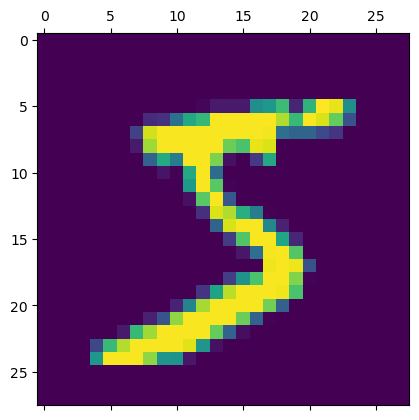

In [4]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])


Normalizing the Dataset

In [5]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)


Building The Neural Network:

In [6]:
model = keras.Sequential([
	keras.layers.Dense(10, input_shape=(784,),
					activation='sigmoid')
])
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.4671 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.3035 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 2s 799us/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.2666 - accuracy: 0.9259


Accuracy Of Model On Testing Data:

In [7]:
model.evaluate(x_test_flatten, y_test)


313/313 [==============================] - 0s 748us/step - loss: 0.2665 - accuracy: 0.9272


[0.26650741696357727, 0.9272000193595886]

**Implementation Of Back Propogation Algorithm:**

In [8]:
# Required Lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# sigmoid Function
def nlinear(x,deriv=False):
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))

In [10]:
#Input dataset
X=np.array([[0,0,1],
           [0,1,1],
           [1,0,1],
           [1,1,1]])

#Output Dataset
# T is transpose function
y=np.array([[0,0,1,1]]).T


np.random.seed(1)

#initalizing weights with random mean 0
synapse0=2*np.random.random((3,1))-1


In [11]:
for i in range(1000):

  #forward Propogation
  layer0=X
  layer1=nlinear(np.dot(layer0,synapse0))

  layer1_error=y-layer1

  #multiply how much error backpropogated
  layer1_delta=layer1_error*nlinear(layer1,True)


  #update weight as per backpropogation
  synapse0+=np.dot(layer0.T,layer1_delta)

In [12]:
print("Output After Training:")
print(layer1)
print("Actucal Output")
print(y)


Output After Training:
[[0.03178421]
 [0.02576499]
 [0.97906682]
 [0.97414645]]
Actucal Output
[[0]
 [0]
 [1]
 [1]]


In [13]:
df=[y,layer1]

In [14]:
df

[array([[0],
        [0],
        [1],
        [1]]),
 array([[0.03178421],
        [0.02576499],
        [0.97906682],
        [0.97414645]])]

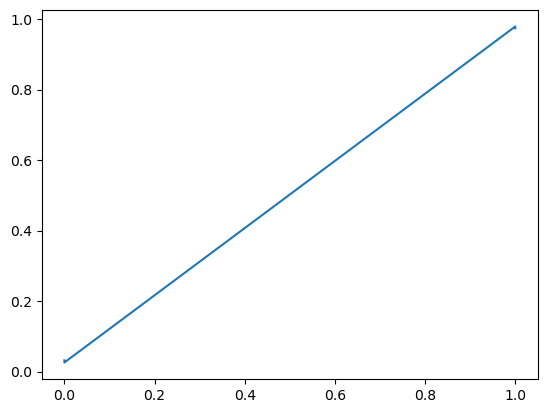

In [15]:
plt.plot(y,layer1)